## Import necessary libaries

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
airlines = pd.read_csv('EastWestAirlinescsv.csv')
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


## Data understanding

In [3]:
airlines.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [4]:
airlines.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [5]:
#drop ID feature
del airlines['ID#']

## Minmax scalar

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
minmax = MinMaxScaler()
minmax = minmax.fit_transform(airlines)
airlines_norm = pd.DataFrame(minmax,columns=airlines.columns)

## Clustering-Hierarchical

In [14]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.spatial.distance import pdist

### Dendogram

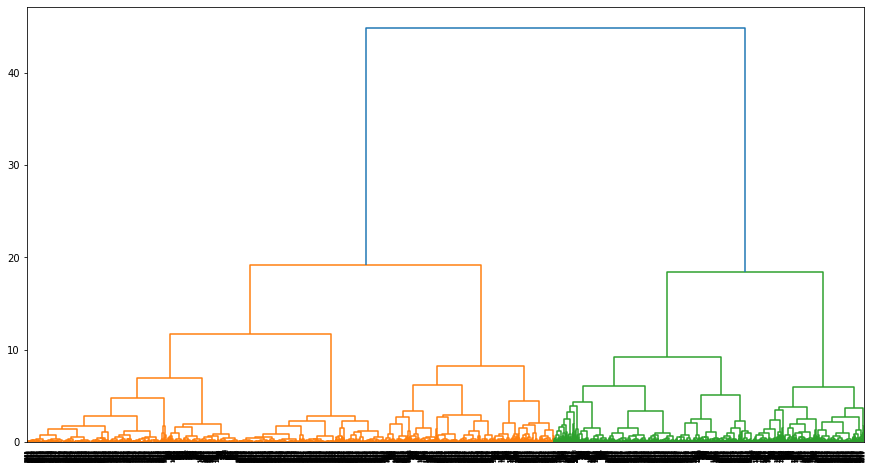

In [19]:
xdist=pdist(airlines_norm,metric="euclidean")
linked = linkage(xdist,'ward')
plt.figure(figsize=[15,8])
dendrogram(linked,orientation='top',distance_sort='descending',show_leaf_counts=True)
plt.show()

In [39]:
hierarchical = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
pred_hierarchical = hierarchical.fit_predict(airlines_norm)

In [40]:
airlines['hierarchical'] = pred_hierarchical

In [41]:
airlines

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hierarchical,kmean
0,28143,0,1,1,1,174,1,0,0,7000,0,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,0,1


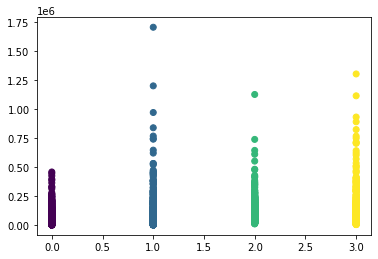

In [42]:
plt.scatter(x=airlines['hierarchical'],y=airlines['Balance'],c=pred_hierarchical)
plt.show()

## K-means

In [29]:
from sklearn.cluster import KMeans

In [31]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(airlines_norm)
pred_kmeans = kmeans.predict(airlines_norm)

## Find optimum cluster

In [32]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(airlines_norm)
    wcss.append(kmeans.inertia_)

In [33]:
wcss

[1830.793212858415,
 823.6756984125232,
 625.1684881570748,
 436.70885761932624,
 348.9433217254147,
 315.150207720015,
 287.7273806512871,
 263.24733395578335,
 245.4499664287091,
 226.1084205536837]

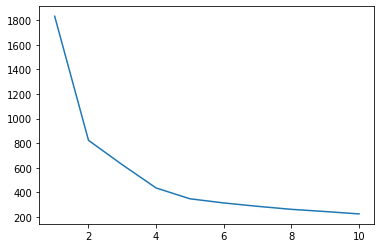

In [34]:
plt.plot(range(1,11),wcss)
plt.show()

## observation

### 4 is optimum cluster

In [36]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(airlines_norm)
pred_kmean = kmeans.predict(airlines_norm)

In [37]:
airlines['kmean'] = pred_kmean

In [38]:
airlines

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hierarchical,kmean
0,28143,0,1,1,1,174,1,0,0,7000,0,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,0,1


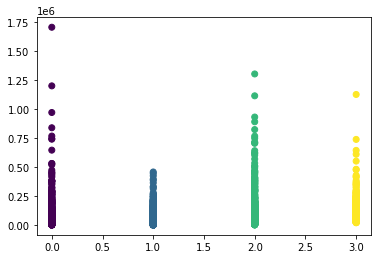

In [43]:
plt.scatter(x=airlines['kmean'],y=airlines['Balance'],c=pred_kmean)
plt.show()

## Dbscan

In [44]:
from sklearn.cluster import DBSCAN

In [46]:
dbscan = DBSCAN( eps=0.5,min_samples=3,metric='euclidean')
pred_dbscan = dbscan.fit_predict(airlines_norm)

In [47]:
airlines['dbscan'] = pred_dbscan

In [48]:
airlines

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hierarchical,kmean,dbscan
0,28143,0,1,1,1,174,1,0,0,7000,0,0,1,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0,1,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,1,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0,1,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1,0,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1,0,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1,2,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0,1,0


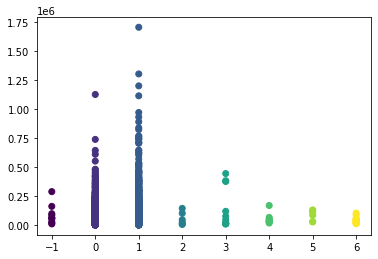

In [50]:
plt.scatter(x=airlines['dbscan'],y=airlines['Balance'],c=pred_dbscan)
plt.show()

## ============================= End =====================================